In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data.shape

(10000, 3)

In [4]:
#Missing Value :
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


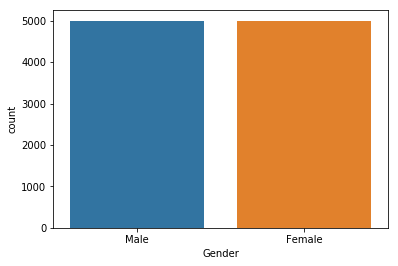

In [6]:
#EDA:Univariate Analysis:
sns.countplot(data['Gender'])

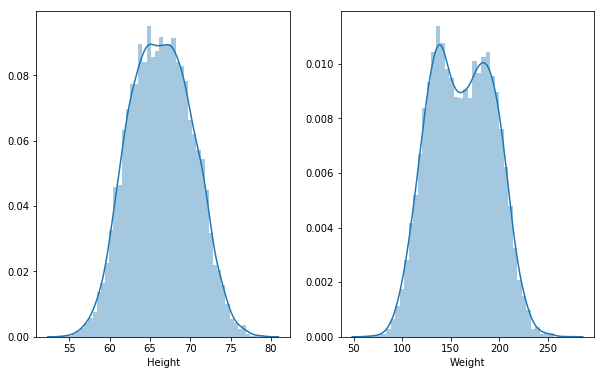

In [7]:
fig=plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(data['Height'])
plt.subplot(122)
sns.distplot(data['Weight'])

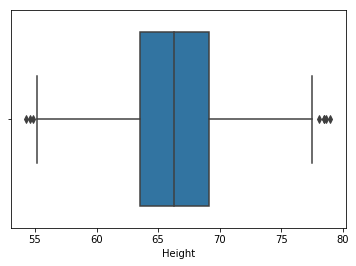

In [8]:
sns.boxplot(data['Height'])

In [9]:
#IQR method for handling Outliers:
q1=data['Height'].quantile(0.25)
q3=data['Height'].quantile(0.75)
iqr=q3-q1
li=q1-1.5*iqr
ul=q3+1.5*iqr
data=data[(data['Height']>=li) &(data['Height']<=ul)]


In [10]:
data.shape

(9992, 3)

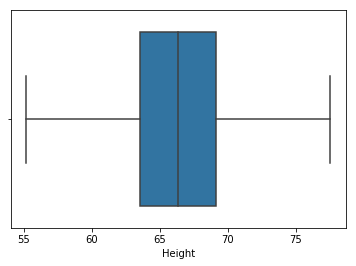

In [25]:
#After removing outlier from Height Attribute
sns.boxplot(data['Height'])

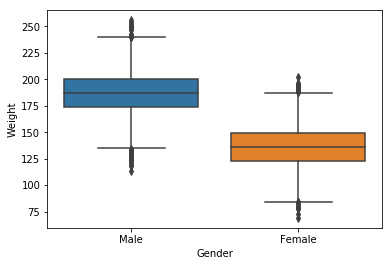

In [12]:
#BiVariate Analysis:
sns.boxplot(data['Gender'],data['Weight'])

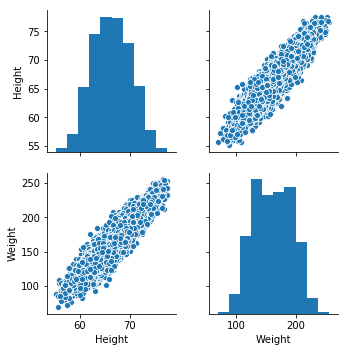

In [13]:
sns.pairplot(data)

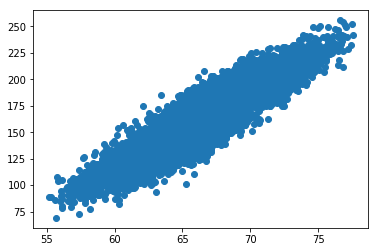

In [14]:
plt.scatter(data['Height'],data['Weight'])

In [15]:
X=data.drop(['Weight'],axis=1)
Y=data['Weight']

In [16]:
data['Gender']=data['Gender'].replace({'Female':0,'Male':1})
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [17]:
#X=pd.get_dummies(X,drop_first=True)
X=data.drop(['Weight'],axis=1)
X.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('The RMSE is {}'.format(np.sqrt(mse)))

The RMSE is 9.991599592496163


In [20]:
r2_score(y_test,y_pred)

0.9041935273237565

In [21]:
my_weight_pred = lr.predict([[0,74]])
my_weight_pred

array([196.94051383])

In [24]:
import pickle
pickle.dump(lr,open('model1.pkl','wb'))